In [62]:
import numpy as np
import pandas as pd

In [3]:
def flip_diagonal(M, diag):
    for i in range(M.shape[0]):
        r = i
        c = i + diag
        if 0 < r < M.shape[0] and 0 < c < M.shape[1]:
            M[r, c] *= -1
    return M

def build_H12():
    H12 = np.ones((12, 12))
    for diag in [0, -1, 2, -3, -4, -5, 6, 7, 8, -9, 10]:
        H12 = flip_diagonal(H12, diag)
    return H12

def build_H4():
    H4 = np.ones((4, 4))
    for diag in [0, -1, 2]:
        H4 = flip_diagonal(H4, diag)
    return H4

In [4]:
mat = build_H12()

In [5]:
x = np.array([12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [6]:
a = (1/12) * mat.T @ x.T

In [7]:
sum(a)

12.0

In [13]:
# Import pairwise2 module
from Bio import pairwise2

# Import format_alignment method
from Bio.pairwise2 import format_alignment

# Define two sequences to be aligned
X = "ACGGGT"
Y = "ACG"

# Get a list of the global alignments between the two sequences ACGGGT and ACG
# No parameters. Identical characters have score of 1, else 0.
# No gap penalties.
alignments = pairwise2.align.globalxx(X, Y)

# Use format_alignment method to format the alignments in the list
for a in alignments:
    print(format_alignment(*a))
    print(a)    

ACGGGT
||  | 
AC--G-
  Score=3

('ACGGGT', 'AC--G-', 3.0, 0, 6)
ACGGGT
|| |  
AC-G--
  Score=3

('ACGGGT', 'AC-G--', 3.0, 0, 6)
ACGGGT
|||   
ACG---
  Score=3

('ACGGGT', 'ACG---', 3.0, 0, 6)


In [14]:
!pip3 install editdistance

     |████████████████████████████████| 51kB 1.7MB/s eta 0:00:011


In [ ]:
pip install editdistance

In [15]:
import editdistance
editdistance.eval('banana', 'bahama')

2

In [17]:
editdistance.distance('banana', 'bahama')

2

In [18]:
!pip3 install edit_distance

In [19]:
import edit_distance
ref = [1, 2, 3, 4]
hyp = [1, 2, 4, 5, 6]
sm = edit_distance.SequenceMatcher(a=ref, b=hyp)
sm.get_opcodes()
sm.ratio()
sm.get_matching_blocks()

In [20]:
sm.get_opcodes()

[['equal', 0, 1, 0, 1],
 ['equal', 1, 2, 1, 2],
 ['insert', 1, 1, 2, 3],
 ['replace', 2, 3, 3, 4],
 ['replace', 3, 4, 4, 5]]

In [22]:
sm = edit_distance.SequenceMatcher(a="ACGGGT", b="ACG")

In [25]:
sm.get_opcodes()

[['equal', 0, 1, 0, 1],
 ['equal', 1, 2, 1, 2],
 ['delete', 2, 3, 1, 1],
 ['delete', 3, 4, 1, 1],
 ['equal', 4, 5, 2, 3],
 ['delete', 5, 6, 2, 2]]

In [91]:
sm = edit_distance.SequenceMatcher(b="ACGGGT", a="ACG")
sm.get_opcodes()

[['equal', 0, 1, 0, 1],
 ['equal', 1, 2, 1, 2],
 ['insert', 1, 1, 2, 3],
 ['insert', 1, 1, 3, 4],
 ['equal', 2, 3, 4, 5],
 ['insert', 2, 2, 5, 6]]

In [26]:
sm.distance()

3

In [58]:
x = "CCATAGAGAGGTTATCCGCTCA"
y = "CCATAGAGAGTGTTATCCGACTCA"
sm = edit_distance.SequenceMatcher(a=x, b=y)
sm.get_opcodes()
sm.distance()

2

In [51]:
sm.get_opcodes()

[['equal', 0, 1, 0, 1], ['equal', 1, 2, 1, 2], ['replace', 2, 3, 2, 3]]

In [43]:
len(x)

22

In [44]:
len(y)

24

In [32]:
dir(sm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compute_distance_fast',
 '_matches',
 '_reset_object',
 'action_function',
 'dist',
 'distance',
 'find_longest_match',
 'get_grouped_opcodes',
 'get_matching_blocks',
 'get_opcodes',
 'matches',
 'opcodes',
 'quick_ratio',
 'ratio',
 'real_quick_ratio',
 'seq1',
 'seq2',
 'set_seq1',
 'set_seq2',
 'set_seqs',
 'test']

In [40]:
sm.seq1

'GGGAATGGATCCACATCTACGAATTCGTACCAGAGAGTGGTTATCCGCTCACCGAGATCGGAAGAGCACACGTCTGAACTCCA'

In [103]:
def get_diff(perfect, x):
    output = []
    sm = edit_distance.SequenceMatcher(a=perfect, b=x)
    for row in sm.get_opcodes():
        if row[0] == "equal":
            continue
        elif row[0] == "insert":
            output.append((row[1], "insert", x[row[3]]))
        elif row[0] == "delete":
            output.append((row[1], "delete"))
        else:
            output.append((row[1], "replace", x[row[3]]))
    return output

In [104]:
get_diff(x, y)

[(9, 'insert', 'T'), (17, 'insert', 'A')]

In [96]:
get_diff("abcdefg", "bbcefgh")

[(0, 'replace', 'b'),
 (2, 'delete'),
 (3, 'delete'),
 (4, 'delete'),
 (5, 'delete'),
 (6, 'delete')]

In [81]:
data = pd.read_csv("data.csv")
#data.sequence.str.decode("utf-8")

In [82]:
seq_kd_pairs = data.groupby('sequence')['kd'].apply(float).to_dict()

In [83]:
seq_kd_pairs

{'AAATAGAGAGGTTATCCGCTCA': 20.950654774685713,
 'ACAAAGAGAGGTTATCCGCTCA': 78.53432476115327,
 'ACACAGAGAGGTTATCCGCTCA': 86.36995824498374,
 'ACAGAGAGAGGTTATCCGCTCA': 53.915192177461215,
 'ACATAAAGAGGTTATCCGCTCA': 57.29969438091468,
 'ACATACAGAGGTTATCCGCTCA': 168.59245072940308,
 'ACATAGAAAGGTTATCCGCTCA': 43.06852968975217,
 'ACATAGACAGGTTATCCGCTCA': 95.85301869983073,
 'ACATAGAGAAGTTATCCGCTCA': 19.189400878467765,
 'ACATAGAGACGTTATCCGCTCA': 162.3206917780225,
 'ACATAGAGAGATTATCCGCTCA': 6.0279362192152925,
 'ACATAGAGAGCTTATCCGCTCA': 13.000496030955324,
 'ACATAGAGAGGATATCCGCTCA': 47.05788894593579,
 'ACATAGAGAGGCTATCCGCTCA': 8.906058414657194,
 'ACATAGAGAGGGTATCCGCTCA': 36.93037098734509,
 'ACATAGAGAGGTAATCCGCTCA': 21.669358891160588,
 'ACATAGAGAGGTCATCCGCTCA': 7.562046969242708,
 'ACATAGAGAGGTGATCCGCTCA': 46.740606003474475,
 'ACATAGAGAGGTTAACCGCTCA': 15.82377689885771,
 'ACATAGAGAGGTTACCCGCTCA': 8.539951711382416,
 'ACATAGAGAGGTTAGCCGCTCA': 7.505308204166014,
 'ACATAGAGAGGTTATACGCTCA':

In [93]:
# want to create a value mapping table of the changes
# the structure goes like this:
# [(index, i, A), (index, i, C), (index, i, G), (index, i  T),
#  (index, r, A), (index, r, C), (index, r, G), (index, r, T), (index, d)]
# index is the position on the rna, i is insertion, r is replacement, d is deletion,
# In the future we can try to have a way to combine these variables
perfect_sequence = "CCATAGAGAGGTTATCCGCTCA"
def get_position(coord):
    if len(coord) == 2:
        return coord[0]*9+8
    elif coord[1] == 'insert' and coord[2] == 'A':
        return coord[0]*9
    elif coord[1] == 'insert' and coord[2] == 'C':
        return coord[0]*9 + 1
    elif coord[1] == 'insert' and coord[2] == 'G':
        return coord[0]*9 + 2
    elif coord[1] == 'insert' and coord[2] == 'T':
        return coord[0]*9 + 3
    elif coord[1] == 'replace' and coord[2] == 'A':
        return coord[0]*9 + 4
    elif coord[1] == 'replace' and coord[2] == 'C':
        return coord[0]*9 + 6
    elif coord[1] == 'replace' and coord[2] == 'G':
        return coord[0]*9 + 6
    elif coord[1] == 'replace' and coord[2] == 'T':
        return coord[0]*9 + 7
    else:
        print ("INCORRECT COORDINATE")
        return -1

    

In [94]:
get_position((1, 'insert', 'T'))

12

In [111]:
data_matrix = []
for seq in seq_kd_pairs:
    print(seq, perfect_sequence)
    coords = get_diff(perfect_sequence, seq)
    row = [0 for i in range(9*len(perfect_sequence))]
    for coord in coords:
        row[get_position(coord)] = 1
    data_matrix.append(row)

AAATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACACAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAGAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATACAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGACAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGACGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTATACGCTCA CCATAGAGAGG

CACTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CACTATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CAGCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CAGTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTACCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTC CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAAAGAGGTT

CCACAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCG CCATAGAGAGG

CCATAAGAGAGGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTTATCCGCTCA CCATAGAGAGGTTATC

CCATAGACAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACCGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGACGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGCGTTATCCGCTCA C

CCATAGAGAGAGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGAGTTATGCCGCTCA CCATAGAGAGGTTATC

CCATAGAGAGGGTATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTATTCGCTCA CCATAGAGA

CCATAGAGAGGTTAATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTA

CCATAGAGAGGTTATCCGACTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGACTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGAGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGATTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCAAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCAATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCACC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCACG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCACT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCAGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCAGT C

CCATAGAGAGGTTATCGCGAGT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCTC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAG

CCATAGAGAGGTTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCCGCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCCGCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTCCGCTC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAG

CCATAGAGGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGGAGTTATCCGCTCA CCATAGAGAGGTTATCC

CCATAGCAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAGAGTGTTATCCGCTCA CCATAGAGAGGTTATC

CCATAGTGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTTA CCATAGAGAGG

CCATGAGAGGTTATCCGTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGGTTATCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGGTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGTAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGATGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGCAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGTAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGATGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGCAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGCAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGACAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGACGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGGAGAGGCTATCCGCTCA CCATA

CCGATAGAGAGGTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTACTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTAGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCGATAGAGAGGTTATCCGCTGCA CCATAGAGAGGTTATC

CGATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATGCGCTCA CCATAGAGAGG

GCATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGGTCA CCATAGAGAGG

In [114]:
data_matrix = np.array(data_matrix)

In [121]:
data_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [124]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data_matrix, data.kd)
reg.coef_
#LinearRegression

array([-1.50556146e+06, -2.60717221e+06,  4.44677305e+05, -2.53104777e+06,
       -5.36231106e+06, -4.11500644e+19, -5.14766321e+06, -1.21111788e+06,
        4.07705576e+05,  3.81277337e+06, -3.33064279e+20, -4.19408605e+06,
        1.65434821e+07,  6.67098823e+06, -4.51365784e+20, -3.44297749e+06,
       -4.83748576e+06, -6.62157825e+06, -1.51792761e+20, -2.33019919e+06,
        2.93138778e+06,  3.41892875e+06, -3.00560076e+20, -4.42485288e+18,
       -3.16007674e+05, -1.24247607e+05, -2.63067561e+06,  1.22014121e+05,
       -4.40661280e+06, -2.39883373e+06, -1.22008852e+20, -4.08160770e+06,
        3.66766439e+20, -1.83500800e+06, -1.12450853e+21,  1.23535360e+07,
        2.55707432e+20, -4.08473600e+06,  4.79436800e+06, -4.21068800e+06,
       -1.64230605e+20, -6.71088550e+19,  9.01120000e+05,  6.55360000e+04,
       -3.37510400e+06, -5.38828800e+06,  3.29932800e+06,  1.65934361e+20,
        4.58342400e+06, -1.62816000e+05, -7.32470667e+20, -4.91520000e+05,
       -2.69926400e+06, -

In [131]:
reg = linear_model.Ridge(alpha=10000000)
reg.fit(data_matrix, data.kd)
reg.coef_

array([-5.55994818e+00, -1.28621883e+01,  8.49282556e+00, -1.29740613e+01,
       -2.88355289e+01,  0.00000000e+00, -2.97399079e+01, -5.88958103e+00,
       -2.15875713e+01,  3.05839527e+01,  0.00000000e+00, -2.19773041e+01,
        1.19491821e+02,  4.32366539e+01,  0.00000000e+00, -3.51058747e+01,
       -2.76323126e+01, -4.50597498e-01,  0.00000000e+00, -8.33469403e+00,
        2.55873062e+01,  2.78110628e+01,  0.00000000e+00,  0.00000000e+00,
       -2.52500491e+01, -6.93354626e-01, -1.62211482e+01,  7.02033693e+00,
       -2.20147767e+01, -1.09762344e+01,  0.00000000e+00, -2.73388151e+01,
        0.00000000e+00, -1.46708573e+01,  0.00000000e+00,  2.74333407e+01,
        0.00000000e+00, -2.19016387e+01,  3.49294075e+01, -3.89243065e+01,
        0.00000000e+00,  0.00000000e+00,  1.46138510e+01, -1.79278134e+00,
       -1.12643453e+01, -3.15424739e+01,  2.75881044e+01,  0.00000000e+00,
        3.64485205e+01,  5.59800758e-01,  0.00000000e+00, -2.07278315e+01,
       -4.24664566e+01, -

In [133]:
reg.intercept_

4506199.448139707

In [136]:
from sklearn.linear_model import HuberRegressor, Ridge

In [138]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(data_matrix, data.kd)
huber.coef_

array([ 22.9386043 ,  -8.1451899 ,   3.47325852,   2.14010213,
         6.14272609,   0.        ,  15.750036  ,  10.87155199,
         4.48957199,  -1.91445647,   0.        ,  -6.18162502,
         6.41119254,   8.51495782,   0.        ,   3.31286913,
        -6.48245397,   1.91282725,   0.        ,  -3.81819291,
         8.6508217 ,   4.61985812,   0.        ,   0.        ,
         2.90670856,  -6.88868225,  -4.08122726,  16.15158604,
        -2.84543235,  -1.18044507,   0.        ,  -8.41235087,
         0.        ,  -5.69259229,   0.        ,   5.41594427,
         0.        ,  -3.67935118,  10.01425249,  16.11387156,
         0.        ,   0.        ,   3.22960823,   3.13875744,
         4.72958439,  -0.86175462,   1.87669126,   0.        ,
       -13.78061366,   1.36735083,   0.        ,  -0.17883533,
        -4.8521897 ,  -2.58351767,   0.        ,  -6.43634187,
        16.73420703, -14.36558277,   0.        ,   0.        ,
         1.07031012,  -9.79860727,   2.94569205,  -7.79

In [139]:
huber.intercept_

42.58678479284711

In [141]:
import matplotlib.pyplot as plt

In [142]:
vals = huber.coef_*data_matrix + huber.intercept_

In [143]:
vals

array([[42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479],
       [42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479],
       [42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479],
       ...,
       [42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479],
       [42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479],
       [42.58678479, 42.58678479, 42.58678479, ..., 42.58678479,
        42.58678479, 42.58678479]])

In [144]:
data_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

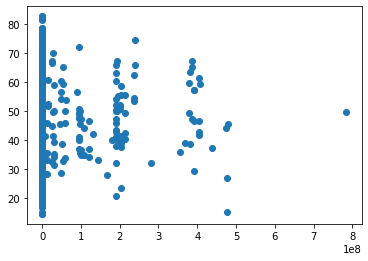

In [151]:
plt.scatter(data.kd, data_matrix @ huber.coef_ + huber.intercept_)

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 6.000e+00, 1.300e+01,
        6.000e+00, 3.600e+01, 2.300e+01, 4.846e+03]),
 array([-7.84460354e+08, -7.06014311e+08, -6.27568268e+08, -5.49122225e+08,
        -4.70676182e+08, -3.92230139e+08, -3.13784096e+08, -2.35338053e+08,
        -1.56892010e+08, -7.84459670e+07,  7.60834981e+01]),
 <a list of 10 Patch objects>)

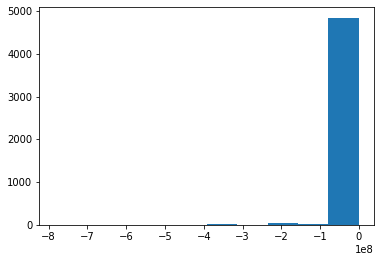

In [154]:
plt.hist(data_matrix @ huber.coef_ + huber.intercept_-data.kd)

In [155]:
predict = data_matrix @ huber.coef_ + huber.intercept_
actual = data.kd

In [157]:
filtered_predict = []
filtered_actual = []

In [158]:
for i in range(len(actual)):
    if actual[i]-predict[i] < 100:
        filtered_predict.append(predict[i])
        filtered_actual.append(actual[i])

(array([  56.,  582., 1300.,  699.,  420.,  306.,  247.,  154.,  122.,
          86.]), array([-76.08349813, -58.49088627, -40.8982744 , -23.30566254,
         -5.71305068,  11.87956119,  29.47217305,  47.06478492,
         64.65739678,  82.25000865,  99.84262051]), <a list of 10 Patch objects>)

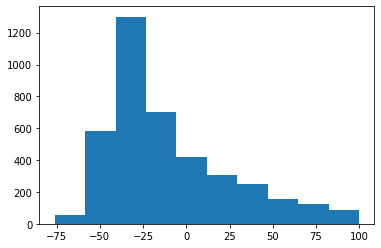

In [160]:
plt.hist(np.array(filtered_actual) - np.array(filtered_predict))

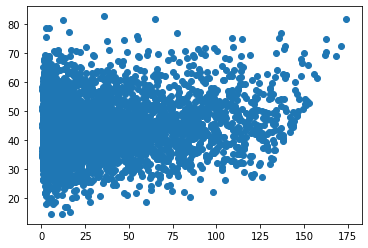

In [164]:
plt.scatter(filtered_actual, filtered_predict)

In [178]:
energies_table = pd.read_csv("consolidated_energies.csv")

In [193]:
energies_table["sequence"] = energies_table.Sequence.str.slice(29, -32).str.replace("U", "T")

In [195]:
big_table = pd.merge(energies_table, data, on='sequence', how="inner")

In [196]:
big_table

,Sequence,Vienna,MFold,sequence,kd,kd_uncertainty,y_intercept,delta_y,count
0,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUAC...,-15.700000,-17.60,CCATAGAGAGGTTATACACGCTCA,1.282946e+00,2.042262e-01,7.440527e-14,37383.0,55
1,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAGAGAGUGGUUAUCC...,-23.600000,-20.97,CCAGAGAGTGGTTATCCGCTCA,9.355456e+03,8.089598e+07,5.581476e+03,37383.0,50
2,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAUGAGGUUAUC...,-20.900000,-20.10,CCATAGATGAGGTTATCCGCGTCA,1.927799e+08,9.641940e+07,4.599657e+03,37383.0,56
3,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUGUAU...,-22.500000,-22.80,CCATAGAGACGGTGTATCCGCTCA,9.757898e+01,9.787093e+00,5.131474e+03,37383.0,79
4,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUCC...,-22.400000,-23.80,CCATAGAGAGGTTATCCGTTCT,8.126226e+01,1.729031e+01,1.219353e+04,37383.0,66
...,...,...,...,...,...,...,...,...,...
4930,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUCUAUC...,-18.600000,-16.42,CCATAGAGAGGTCTATCCGCTCA,1.873243e+01,4.099477e+00,5.714606e+03,37383.0,61
4931,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUGGAGGGGUUAUCC...,-20.100000,-21.30,CCATGGAGGGGTTATCCGCTCA,1.582673e+02,2.620822e+01,6.627987e+03,37383.0,65
4932,GGGAAUGGAUCCACAUCUACGAAUUCGUACUAUAGAGAGGUUAGCC...,-16.200001,-18.60,CTATAGAGAGGTTAGCCGCTCA,6.526651e-01,1.228970e-01,5.173292e-16,37383.0,57
4933,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUUAUC...,-18.799999,-20.70,CCATAGAGACGGTTATCCTGCTCA,6.897266e+01,6.388164e+00,1.717545e+03,37383.0,74


In [170]:
energies_table.shape

(4936, 3)

In [171]:
data.shape

(4935, 6)

In [ ]:
#combine energies_table and data_table


In [194]:
energies_table

,Sequence,Vienna,MFold,sequence
0,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUAC...,-15.700000,-17.60,CCATAGAGAGGTTATACACGCTCA
1,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAGAGAGUGGUUAUCC...,-23.600000,-20.97,CCAGAGAGTGGTTATCCGCTCA
2,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAUGAGGUUAUC...,-20.900000,-20.10,CCATAGATGAGGTTATCCGCGTCA
3,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUGUAU...,-22.500000,-22.80,CCATAGAGACGGTGTATCCGCTCA
4,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUCC...,-22.400000,-23.80,CCATAGAGAGGTTATCCGTTCT
...,...,...,...,...
4931,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUCUAUC...,-18.600000,-16.42,CCATAGAGAGGTCTATCCGCTCA
4932,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUGGAGGGGUUAUCC...,-20.100000,-21.30,CCATGGAGGGGTTATCCGCTCA
4933,GGGAAUGGAUCCACAUCUACGAAUUCGUACUAUAGAGAGGUUAGCC...,-16.200001,-18.60,CTATAGAGAGGTTAGCCGCTCA
4934,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUUAUC...,-18.799999,-20.70,CCATAGAGACGGTTATCCTGCTCA


In [188]:
data

,sequence,kd,kd_uncertainty,y_intercept,delta_y,count
0,CCATAGAGAGGTTTAGGCGACA,0.517603,1.055628e-01,3.027492e-11,37383.0,56
1,CCATAAGAGAGGTTAGTCCGCTCA,11.486027,1.641445e+00,1.308034e-07,37383.0,69
2,CCATGAGAGAGGTTATCCGCTGCA,9.419114,1.254518e+00,9.665783e+02,37383.0,69
3,CCATAGAAGGTTATCCGCTC,266.614501,3.639929e+01,2.336285e+03,37383.0,88
4,CCATAGAGAGGTTTATCCCGCTCA,7.480055,1.336522e+00,3.126620e+03,37383.0,69
...,...,...,...,...,...,...
4930,CGATAGAGAAGTTATCCGCTCA,5281.858490,2.963542e+07,4.257374e+03,37383.0,69
4931,CCATAGAGAGGTTATCCGCTGCAT,1.670426,3.827929e-01,1.310301e-07,37383.0,47
4932,CCACTAGAGAGGTTATCCGCTACA,2.366272,4.647008e-01,7.065818e-09,37383.0,58
4933,CCATAGAGAGGTTATCTGCGCA,1.798317,4.631302e-01,9.508548e-08,37383.0,55


In [203]:
reg = linear_model.Ridge(alpha=10)
reg.fit(np.array(big_table.Vienna).reshape(-1,1), big_table.kd)
reg.coef_

array([-4487057.00050507])

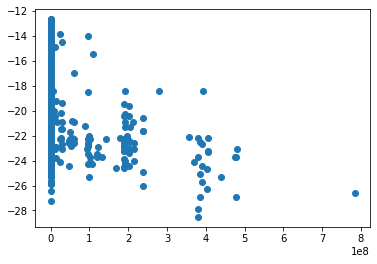

In [205]:
plt.scatter(big_table.kd, big_table.Vienna)

In [207]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(np.array(big_table.Vienna).reshape(-1,1), data.kd)
huber.coef_

array([-2.2130179])

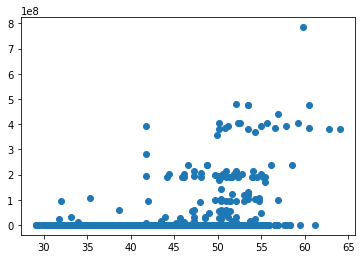

In [211]:
plt.scatter(big_table.Vienna * huber.coef_ + huber.intercept_, big_table.kd )

In [218]:
PERFECT_KD = big_table[big_table['sequence'] == perfect_sequence].iloc[0]['kd']
big_table['ABA'] = (big_table.kd/PERFECT_KD).apply(np.log)

In [219]:
big_table

,Sequence,Vienna,MFold,sequence,kd,kd_uncertainty,y_intercept,delta_y,count,ABA
0,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUAC...,-15.700000,-17.60,CCATAGAGAGGTTATACACGCTCA,1.282946e+00,2.042262e-01,7.440527e-14,37383.0,55,-0.814520
1,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAGAGAGUGGUUAUCC...,-23.600000,-20.97,CCAGAGAGTGGTTATCCGCTCA,9.355456e+03,8.089598e+07,5.581476e+03,37383.0,50,8.080036
2,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAUGAGGUUAUC...,-20.900000,-20.10,CCATAGATGAGGTTATCCGCGTCA,1.927799e+08,9.641940e+07,4.599657e+03,37383.0,56,18.013380
3,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUGUAU...,-22.500000,-22.80,CCATAGAGACGGTGTATCCGCTCA,9.757898e+01,9.787093e+00,5.131474e+03,37383.0,79,3.516983
4,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUCC...,-22.400000,-23.80,CCATAGAGAGGTTATCCGTTCT,8.126226e+01,1.729031e+01,1.219353e+04,37383.0,66,3.334002
...,...,...,...,...,...,...,...,...,...,...
4930,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUCUAUC...,-18.600000,-16.42,CCATAGAGAGGTCTATCCGCTCA,1.873243e+01,4.099477e+00,5.714606e+03,37383.0,61,1.866577
4931,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUGGAGGGGUUAUCC...,-20.100000,-21.30,CCATGGAGGGGTTATCCGCTCA,1.582673e+02,2.620822e+01,6.627987e+03,37383.0,65,4.000606
4932,GGGAAUGGAUCCACAUCUACGAAUUCGUACUAUAGAGAGGUUAGCC...,-16.200001,-18.60,CTATAGAGAGGTTAGCCGCTCA,6.526651e-01,1.228970e-01,5.173292e-16,37383.0,57,-1.490370
4933,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGACGGUUAUC...,-18.799999,-20.70,CCATAGAGACGGTTATCCTGCTCA,6.897266e+01,6.388164e+00,1.717545e+03,37383.0,74,3.170031


In [220]:
reg = linear_model.Ridge(alpha=10)
reg.fit(np.array(big_table.Vienna).reshape(-1,1), big_table.ABA)
reg.coef_

array([-0.71823649])

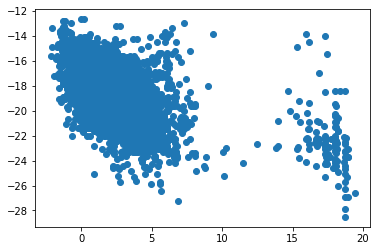

In [222]:
plt.scatter(big_table.ABA, big_table.Vienna)

In [227]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(np.array(big_table.Vienna).reshape(-1,1), big_table.ABA)
huber.coef_

array([-0.5396288])

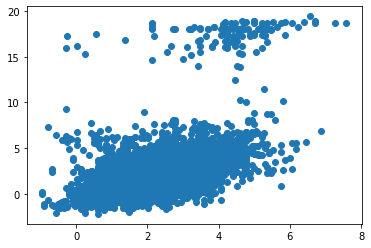

In [229]:
plt.scatter(big_table.Vienna * huber.coef_ + huber.intercept_, big_table.ABA )

In [231]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data_matrix, big_table.ABA)
reg.coef_
#LinearRegression

array([-5.20572255e-01, -4.54519861e-01, -1.13057343e-01, -3.40485264e-01,
        4.88267144e-01, -3.04476128e+13,  3.16777733e-01, -2.73028729e-01,
        6.54045516e-02, -3.41110029e-01,  2.06963207e+12, -7.14977322e-01,
       -4.25483284e-01, -5.27652372e-01,  4.58502046e+12, -7.60800645e-02,
       -8.97609795e-01, -1.24007782e+00, -3.82708099e+13, -6.18153837e-01,
       -5.84813427e-01, -2.86710342e-01, -3.66665948e+13, -5.93046779e+12,
       -4.18223342e-01, -1.54048485e-01, -1.62300793e-01, -2.62864982e-01,
       -2.74207166e-01, -3.48766666e-01,  4.26912497e+13,  7.34413952e-01,
        1.19317692e+13,  7.03125000e-02,  1.41079663e+12, -9.68750000e-01,
       -3.56882686e+13, -4.83398438e-01, -1.26953125e-02,  8.20312500e-02,
       -7.06914373e+11,  2.23799518e+13, -2.42187500e-01,  8.41796875e-01,
       -5.58593750e-01,  2.00946808e-01, -1.34414673e-01, -4.45407297e+12,
        5.98354340e-01,  6.00585938e-02,  2.98479828e+13, -4.37500000e-01,
       -3.83773804e-01,  

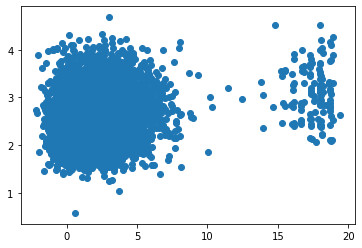

In [234]:
plt.scatter(big_table.ABA, data_matrix @ reg.coef_ + reg.intercept_)

In [236]:
reg = linear_model.Ridge(alpha=10000000)
reg.fit(data_matrix, big_table.ABA)
reg.coef_

array([-2.87247557e-06, -2.39779659e-06, -7.46222639e-08, -1.60882790e-06,
        4.26099286e-06,  0.00000000e+00,  3.29787097e-06, -5.44723098e-07,
       -1.11413852e-06, -1.61194405e-06,  0.00000000e+00, -4.24325066e-06,
       -2.21254396e-06, -1.85598231e-06,  0.00000000e+00,  4.09973261e-07,
       -4.37767925e-06, -8.70064270e-08,  0.00000000e+00, -3.37906130e-06,
       -3.16224628e-06, -1.13883443e-06,  0.00000000e+00,  0.00000000e+00,
       -4.28937500e-06,  5.36001759e-07, -3.01972790e-07, -1.13769813e-06,
       -1.18272613e-06, -1.74923759e-06,  0.00000000e+00,  6.96499943e-06,
        0.00000000e+00,  3.23522723e-06,  0.00000000e+00, -1.88440830e-06,
        0.00000000e+00, -2.46012120e-06,  7.66885534e-07, -1.04006278e-08,
        0.00000000e+00,  0.00000000e+00, -6.05484658e-07,  7.76308543e-06,
       -8.80827936e-07,  2.36673500e-06,  5.59349519e-10,  0.00000000e+00,
        4.98498976e-06,  1.78117749e-06,  0.00000000e+00, -1.87116461e-06,
       -2.49643945e-06,  

In [237]:
seq_ABA_pairs = big_table.groupby('sequence')['ABA'].apply(float).to_dict()

In [238]:
seq_ABA_pairs

{'AAATAGAGAGGTTATCCGCTCA': 1.9784906135373155,
 'ACAAAGAGAGGTTATCCGCTCA': 3.29985650081872,
 'ACACAGAGAGGTTATCCGCTCA': 3.394960623344524,
 'ACAGAGAGAGGTTATCCGCTCA': 2.9237330102762304,
 'ACATAAAGAGGTTATCCGCTCA': 2.98461600353602,
 'ACATACAGAGGTTATCCGCTCA': 4.063804981841795,
 'ACATAGAAAGGTTATCCGCTCA': 2.6991132742906796,
 'ACATAGACAGGTTATCCGCTCA': 3.4991366764909655,
 'ACATAGAGAAGTTATCCGCTCA': 1.8906788025210475,
 'ACATAGAGACGTTATCCGCTCA': 4.025894670820742,
 'ACATAGAGAGATTATCCGCTCA': 0.7327254134503002,
 'ACATAGAGAGCTTATCCGCTCA': 1.5013082264568995,
 'ACATAGAGAGGATATCCGCTCA': 2.787699237011597,
 'ACATAGAGAGGCTATCCGCTCA': 1.1230524793967762,
 'ACATAGAGAGGGTATCCGCTCA': 2.5453549880003377,
 'ACATAGAGAGGTAATCCGCTCA': 2.0122199435193906,
 'ACATAGAGAGGTCATCCGCTCA': 0.9594626301650244,
 'ACATAGAGAGGTGATCCGCTCA': 2.7809340079371383,
 'ACATAGAGAGGTTAACCGCTCA': 1.6978343893675298,
 'ACATAGAGAGGTTACCCGCTCA': 1.0810760668755837,
 'ACATAGAGAGGTTAGCCGCTCA': 0.9519312442493076,
 'ACATAGAGAGGTTATACGC

In [249]:
aba_data_matrix = []
for seq in seq_ABA_pairs:
    print(seq, perfect_sequence)
    coords = get_diff(perfect_sequence, seq)
    row = [0 for i in range(9*len(perfect_sequence))]
    for coord in coords:
        row[get_position(coord)] = 1
    aba_data_matrix.append(row)
aba_data_matrix = np.array(aba_data_matrix)

AAATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACACAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAGAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATACAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGACAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGACGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTATACGCTCA CCATAGAGAGG

CACGATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CACTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CACTATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CAGCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CAGTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTACCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTC CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCCGTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTATCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGGTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATAGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CATTAGAGAGG

CCACAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCACAGAGAGGTTATCCGCTCG CCATAGAGAGG

CCATAAGAGAGGTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATC

CCATAGACCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGACGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGCGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTACTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTAGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGACGAGGTTATCCGCCTCA CCATAGAGAGGTTATCC

CCATAGAGAGATTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGATTATCGGCTCA CCATAGAGAGG

CCATAGAGAGGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTAATCCGCTTA CCATA

CCATAGAGAGGTTACTCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTACTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAGC

CCATAGAGAGGTTATCCGCGTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTAACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTACGA CCATAGAGAGGTTATCCGCTCA
CCAT

CCATAGAGAGGTTATCTGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATGCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGA

CCATAGAGAGTGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCGCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCGCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCGCTC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTATCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGTTTACCCGCTCA CCATAGAG

CCATAGAGCGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGCGGTTATCCGCTCT CCATAGAGAGG

CCATAGATGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGATGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGCAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATGTAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGATTGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCACGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTC

CCATAGTGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCG CCATAGAGAGG

CCATGAGAGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGACGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGCGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTACTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTAGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAGAGGTTATCCGCGTCA CCATAGAGAGGTTAT

CCCTAGAGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGAGTGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGATAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGCGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTAGTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTATAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTCGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTGGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCCTTGAGAGGTTATCCGCTCA CCATAGAGA

CGATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGGTCA CCATAGAGAGG

GCATAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
GCATAGAGCGGTTATCCGCTCA CCATAGAGAGG

In [256]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(aba_data_matrix, np.array(list(seq_ABA_pairs.values())))
reg.coef_
#LinearRegression

array([-5.04428937e-02,  4.52686321e-01,  1.19862376e+00,  8.83437690e-01,
        4.97795200e-01, -1.05207696e+08,  3.06403829e+00,  1.56365568e+00,
       -2.14043123e+00,  1.99427724e-01,  1.46423737e+13,  1.77806325e+00,
        1.16363097e-01,  8.11418464e-01,  2.26513025e+13,  4.80975087e+00,
       -1.73641583e+00,  4.74596988e+00, -4.22510181e+13, -1.13706998e+00,
        3.42599711e+00,  4.97682511e-01, -1.06915148e+13, -1.42810013e+13,
        5.22723001e+00,  5.48316018e-01,  4.54655986e-01,  3.52496945e-01,
        1.17862206e+00,  8.35875071e-01,  6.92996210e+13,  1.08034049e+00,
       -1.12331251e+12,  1.12719727e+00,  4.76463045e+13,  1.77636719e+00,
       -2.43153555e+13,  8.16406250e-01,  6.81640625e-01, -8.64257812e-02,
       -1.76186858e+13,  1.79149872e+13,  1.73828125e+00,  7.30468750e-01,
        3.45898438e+00,  3.79638672e-02,  1.09045410e+00, -3.09771162e+13,
        2.02990723e+00,  9.22851562e-01,  2.80857606e+13,  7.61718750e-01,
        6.33056641e-01,  

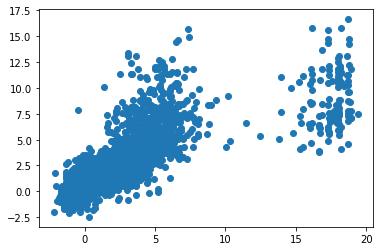

In [257]:
plt.scatter(seq_ABA_pairs.values(), aba_data_matrix @ reg.coef_ + reg.intercept_)

In [264]:
reg = linear_model.Ridge(alpha=20)
reg.fit(aba_data_matrix, np.array(list(seq_ABA_pairs.values())))
reg.coef_

array([-1.77575393e-01,  2.14221744e-01,  7.82921011e-01,  5.62346222e-01,
        2.19594768e-01,  0.00000000e+00,  2.22608614e+00,  1.03769938e+00,
       -8.43499282e-01,  3.58729715e-02,  0.00000000e+00,  1.21802753e+00,
       -4.29116505e-02,  4.62844657e-01,  0.00000000e+00,  3.71393656e+00,
       -1.48106682e+00,  1.45104398e-01,  0.00000000e+00, -1.01670389e+00,
        2.51917922e+00,  2.48475357e-01,  0.00000000e+00,  0.00000000e+00,
        4.35287596e+00,  3.18181542e-01,  2.60673110e-01,  1.23032901e-01,
        7.36199880e-01,  5.05791778e-01,  0.00000000e+00,  7.82917101e-01,
        0.00000000e+00,  7.99125959e-01,  0.00000000e+00,  9.12339372e-01,
        0.00000000e+00,  4.75864388e-01,  4.06355530e-01, -1.25144210e-01,
        0.00000000e+00,  0.00000000e+00,  1.34174425e+00,  5.02810205e-01,
        1.80237850e+00, -9.75421674e-02,  7.04551073e-01,  0.00000000e+00,
        1.44545029e+00,  5.63207831e-01,  0.00000000e+00,  6.73898015e-01,
        5.09109101e-01,  

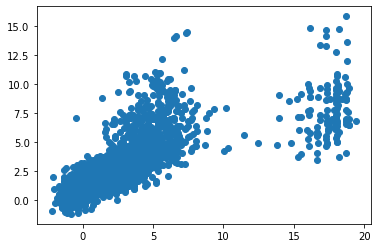

In [265]:
plt.scatter(seq_ABA_pairs.values(), aba_data_matrix @ reg.coef_ + reg.intercept_)

In [ ]:
insetions = [0 for i in range(len(perfect_sequence))]
deletions = [0 for i in range(len(perfect_sequence))]
for elt in reg.coef_/4:
    

In [262]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(aba_data_matrix, np.array(list(seq_ABA_pairs.values())))
huber.coef_

array([ 2.64504057e-01,  9.64158396e-01,  1.33116857e+00,  1.17509451e+00,
        5.45245163e-01,  0.00000000e+00,  2.60031111e+00,  1.30635736e+00,
        3.72032620e-01,  4.15412998e-01,  0.00000000e+00,  1.85319399e+00,
        4.96309419e-01,  1.24518352e+00,  0.00000000e+00,  4.18282669e+00,
       -1.64594182e+00,  2.60345032e+00,  0.00000000e+00, -9.87132746e-01,
        2.92318599e+00,  8.21307741e-01,  0.00000000e+00,  0.00000000e+00,
        2.51223485e+00,  9.82646798e-01,  5.93032024e-01,  5.56319847e-01,
        1.49149606e+00,  1.19648500e+00,  0.00000000e+00,  1.49404688e+00,
        0.00000000e+00,  1.53672377e+00,  0.00000000e+00,  1.54841279e+00,
        0.00000000e+00,  1.12733864e+00,  1.03288402e+00,  5.09743819e-01,
        0.00000000e+00,  0.00000000e+00,  1.71948867e+00,  1.06315165e+00,
        2.77100861e+00,  4.49537074e-01,  1.49462993e+00,  0.00000000e+00,
        1.63360820e+00,  1.38078165e+00,  0.00000000e+00,  1.36574617e+00,
        1.02115666e+00,  

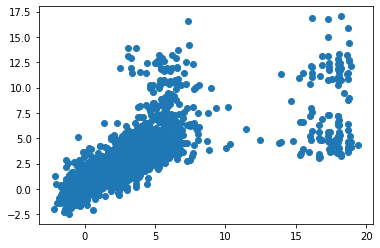

In [263]:
plt.scatter(seq_ABA_pairs.values(), aba_data_matrix @ huber.coef_ + huber.intercept_)

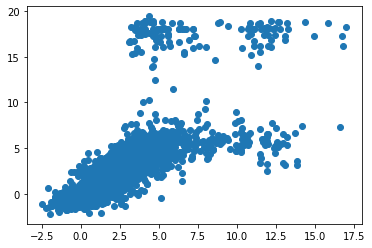

In [266]:
plt.scatter(aba_data_matrix @ huber.coef_ + huber.intercept_, seq_ABA_pairs.values())

In [268]:
list(seq_ABA_pairs.values())

[1.9784906135373155,
 3.29985650081872,
 3.394960623344524,
 2.9237330102762304,
 2.98461600353602,
 4.063804981841795,
 2.6991132742906796,
 3.4991366764909655,
 1.8906788025210475,
 4.025894670820742,
 0.7327254134503002,
 1.5013082264568995,
 2.787699237011597,
 1.1230524793967762,
 2.5453549880003377,
 2.0122199435193906,
 0.9594626301650244,
 2.7809340079371383,
 1.6978343893675298,
 1.0810760668755837,
 0.9519312442493076,
 -0.3835285344532269,
 -0.3151251268182738,
 4.287816324642782,
 1.4837668315496373,
 1.5929600672910693,
 3.2720802460073717,
 4.602712724726765,
 3.5008671233125175,
 1.627399056334178,
 1.1041770938857873,
 4.614863644396827,
 1.3829792766122553,
 1.7117356206706573,
 2.874012049670229,
 1.8713918422879388,
 1.852326563733592,
 4.782852913933564,
 4.358052030773176,
 0.06819095234048467,
 0.6401405271464882,
 -0.26823343275828776,
 0.6836911736015018,
 2.6340284827980787,
 0.9565096471453393,
 0.8161703698725872,
 0.8898666328400919,
 4.021733982852757,
 4.7

In [278]:
combined_features_matrix = np.c_[ aba_data_matrix,np.array(list(seq_ABA_pairs.values())) ] 
combined_features_matrix = np.c_[ aba_data_matrix,np.ones(len(seq_ABA_pairs.values())) ] 

In [280]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(combined_features_matrix, np.array(list(seq_ABA_pairs.values())))
huber.coef_

array([ 2.66454414e-01,  9.66250203e-01,  1.33352812e+00,  1.17649266e+00,
        5.46913885e-01,  0.00000000e+00,  2.60099578e+00,  1.30791854e+00,
        3.72468083e-01,  4.17166421e-01,  0.00000000e+00,  1.85543484e+00,
        4.98499958e-01,  1.24734907e+00,  0.00000000e+00,  4.18187111e+00,
       -1.64117660e+00,  2.56376870e+00,  0.00000000e+00, -9.85829531e-01,
        2.92507878e+00,  8.23016086e-01,  0.00000000e+00,  0.00000000e+00,
        2.51443166e+00,  9.84763129e-01,  5.93593381e-01,  5.57876662e-01,
        1.49352756e+00,  1.19759684e+00,  0.00000000e+00,  1.49514235e+00,
        0.00000000e+00,  1.53872700e+00,  0.00000000e+00,  1.55067779e+00,
        0.00000000e+00,  1.12858147e+00,  1.03433471e+00,  5.11431605e-01,
        0.00000000e+00,  0.00000000e+00,  1.71957306e+00,  1.06516246e+00,
        2.77531596e+00,  4.51098881e-01,  1.49672741e+00,  0.00000000e+00,
        1.63426712e+00,  1.38099152e+00,  0.00000000e+00,  1.36712633e+00,
        1.02270962e+00,  

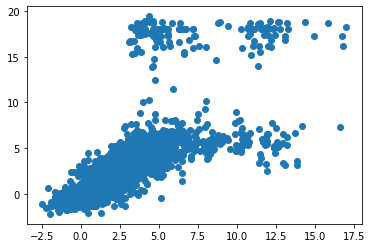

In [281]:
plt.scatter(combined_features_matrix @ huber.coef_ + huber.intercept_, seq_ABA_pairs.values())

In [284]:
combined_data_matrix = []
for seq in seq_ABA_pairs:
    print(seq, perfect_sequence)
    coords = get_diff(perfect_sequence, seq)
    row = [0 for i in range(9*len(perfect_sequence))]
    for coord in coords:
        row[get_position(coord)] = 1
    #append the value of the energy levels
    row.append(big_table[big_table['sequence'] == seq].iloc[0]['Vienna'])
    combined_data_matrix.append(row)
    
    
combined_data_matrix = np.array(aba_data_matrix)

AAATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACACAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACAGAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATACAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGACAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGACGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
ACATAGAGAGGTTATACGCTCA CCATAGAGAGG

CCAAAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCAAAGAGCGGTTATCCGCTCA CCATAGAGAGG

CCACTAGAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGATGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGCAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGAGTAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGATGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGCAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTAGTAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCACTATGAGAGGTTATCCGCTCA CCATAGAGAGGTTAT

CCATAAGAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGATGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGCAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAAGAGGTATCCGCTCA CCATAGAGAGGTTATCCGC

CCATAGAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAAGAGTGTTATCCGCTCA CCATAGAGAGGTTATC

CCATAGAGAAGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAAGTTATCCGGTCA CCATAGAGA

CCATAGAGAGCGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGCGTTCATCCGCTCA CCATAGAGAGGTTATC

CCATAGAGAGGGTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTACTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTAGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA

CCATAGAGAGGTGTATCCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTGTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAAACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAACCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTAAC

CCATAGAGAGGTTATAGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATATGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCAACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCAACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCACGCTCTA CCATAGAGAGGTTATCCGCTCA
C

CCATAGAGAGGTTATCCGCTCAAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCACC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCACG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCACT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAGC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAGG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAGT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCATA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCATC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCATG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCATT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCCGCTCCAA CCATAGAGAGGTTATCCGCTC

CCATAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCAC CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCAG CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCAT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTCTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGCTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCGTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTATCTGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGA

CCATAGAGAGGTTGTCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTGTCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTGTGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTGTTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTACTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGCGACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGCGAGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGCGAGT CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCACGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGACTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTATCCGCATCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGAGGTTTAT

CCATAGAGATGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATTGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGATTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGCACGGTTATCCGCTCA CCATAGA

CCATAGAGTAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTATGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGCCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGCGACA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGCGAGA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGCGAGT CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGCGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATAGGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCAATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGAGTCGTTATCCG

CCATAGCGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCGTGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCTAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGCTAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGGAAGAGGTTATCCGCTCA CCATAGA

CCATAGTGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATAGTGCGGTTATCCGCTCA CCATAGAGAGG

CCATCGAGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGAGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGATGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGCGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGGGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGAGTGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGATAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGCGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCGTGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATCTAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGACGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGAAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATGAGACGAGGTTATCCGCTCA CCA

CCATTGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCCTCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCGGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATCTGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATGCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTATTCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTCTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTGTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGGTTTTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCATTGAGAGTTTATCCGCTCA CCATAGAGAGG

CCGTAGACAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAAGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGACGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGATTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGCTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGATATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGCTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGGTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTAATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CCGTAGAGAGGTTATCCGCGCA CCATAGAGAGG

CGATAGAGAGGTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTAACCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTACCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTAGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATACGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCAGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCACTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCCCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGATCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCACA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCCCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCGCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTAA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCC CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCG CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTCT CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTGA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGCTTA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGGTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCGTTCA CCATAGAGAGGTTATCCGCTCA
CGATAGAGAGGTTATCCTCTCA CCATAGAGAGG

CTCATAGAGAGGTTATCGCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTATCTCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTATGCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTATTCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTCATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTGATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGGTTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGAGTGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGATGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGCAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGAGTAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGATGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGCAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATAGTAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATATGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATCAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATGAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCATTAGAGAGGTTATCCGCTCA CCATAGAGAGGTTATCCGCTCA
CTCCATAGAGAGGTTATCCGCTCA CCATAGAGAGGTTAT

In [285]:
combined_data_matrix

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -18.20000076],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -18.20000076],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -18.20000076],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -19.5       ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -20.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -18.70000076]])

In [286]:
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(combined_data_matrix, np.array(list(seq_ABA_pairs.values())))
huber.coef_

array([ 0.31673889, -0.3328546 ,  1.16388531,  0.51577437,  0.37107979,
        0.        ,  1.67045149,  0.87890753,  0.51417942,  0.34524431,
        0.        ,  1.21505454,  0.18749767,  1.08814695,  0.        ,
        3.51956049, -1.83314495,  0.1460569 ,  0.        , -1.06516001,
        1.6369955 ,  0.66422233,  0.        ,  0.        ,  1.32642938,
        0.69753123,  0.47003381,  0.51824073,  1.09376399,  0.88342871,
        0.        ,  1.37816508,  0.        ,  1.18505071,  0.        ,
        1.62356103,  0.        ,  0.90758562,  0.59411939,  0.33578073,
        0.        ,  0.        ,  1.05218132,  0.74896924,  1.89783803,
        0.44693136,  1.12769278,  0.        ,  0.58461052,  1.50546902,
        0.        ,  1.3568958 ,  1.38173239,  2.38383241,  0.        ,
        1.57940188, -0.05145179,  5.04688826,  0.        ,  0.        ,
        0.68011608,  0.87402803,  1.89408535,  0.41751248, -0.09318323,
        0.        ,  0.40722225,  1.10845971,  0.        ,  1.46

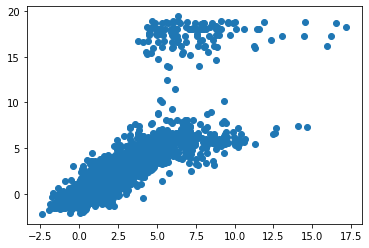

In [287]:
plt.scatter(combined_data_matrix @ huber.coef_ + huber.intercept_, seq_ABA_pairs.values())